In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 데이터 불러오기

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape # (행, 열)

(891, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# 결측치 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# 요약통계 -> 수치형 데이터 통계만 나옴
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
train['Survived'].unique()

array([0, 1], dtype=int64)

In [23]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
# 상관관계
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [26]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### 시각화

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

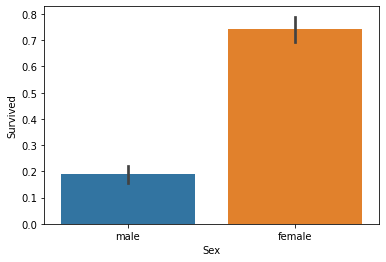

In [28]:
sns.barplot(x=train['Sex'], y=train['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

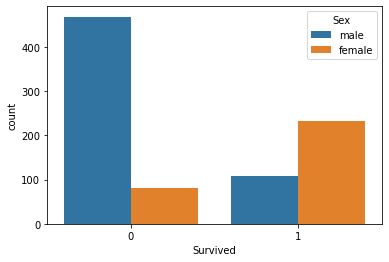

In [31]:
sns.countplot(x=train['Survived'], hue=train['Sex'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

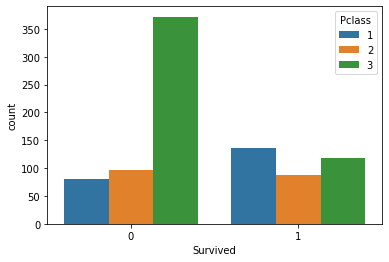

In [33]:
# 객실 등급에 따른 생존 여부
sns.countplot(x=train['Survived'], hue=train['Pclass'])

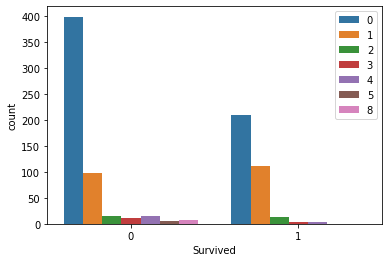

In [36]:
# 형제/배우자에 따른 생존여부
sns.countplot(x=train['Survived'], hue=train['SibSp'])
plt.legend(loc='upper right')
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

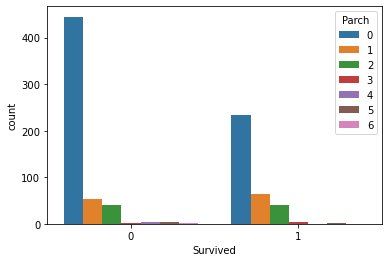

In [37]:
sns.countplot(x=train['Survived'], hue=train['Parch'])

### 데이터 전처리

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [57]:
# 컬럼 삭제
train.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [58]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [62]:
# 나이의 결측치를 중앙값으로 대치
train['Age'].fillna(train['Age'].median(), inplace=True)

In [64]:
train['Age'].isnull().sum()

0

In [66]:
# 나이값을 범위값으로 변경
train['Age'].describe() # 분포 확인

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [98]:
'''
Age2라는 컬럼에
<=15 : 0
<=20 : 1
<=25 : 2
<=30 : 3
<=35 : 4
<=50 : 5
나머지 : 6
'''
def ageTrans(v):
    if v<=15:
        return 0
    elif v<=20:
        return 1
    elif v<=25:
        return 2
    elif v<=30:
        return 3
    elif v<=35:
        return 4
    elif v<=50:
        return 5
    else :
        return 6
train['Age2']= train['Age'].apply(ageTrans)

In [100]:
train[['Age','Age2']]

,Age,Age2
0,22.0,2
1,38.0,5
2,26.0,3
3,35.0,4
4,35.0,4
...,...,...
886,27.0,3
887,19.0,1
888,28.0,3
889,26.0,3


In [ ]:

train.loc[:,['Age','Age2']].sort_values(by=['Age'])
train['Age2'].value_counts().sort_index()

<AxesSubplot:xlabel='Survived', ylabel='count'>

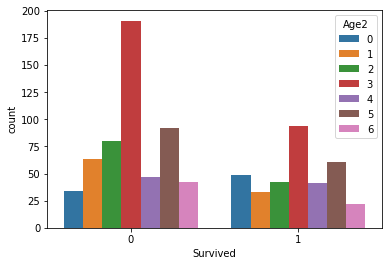

In [101]:
# 변환한 나이로 생존여부 시각화
sns.countplot(x=train['Survived'], hue=train['Age2'])

In [114]:
# 성별을 수치형으로 변환
# Sex2 컬럼 추가
# male : 0, female : 1

# def sexChange(v):
#     if v == 'male':
#         return 0
#     else : 
#         return 1
# train['Sex2'] = train['Sex'].apply(sexChange)

train['Sex2'] = train['Sex'].map({'male':0, 'female':1})
train[['Sex', 'Sex2']]

,Sex,Sex2
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,1
889,male,0


In [121]:
# 탑승항구 결측치 처리
train['Embarked'].isnull().sum()
train['Embarked'].value_counts()
train['Embarked'] = train['Embarked'].fillna('S')

In [128]:
train['Embarked'].mode()[0] # 최빈값을 확인하는 함수 df.mode()

'S'

In [129]:
train['Embarked'].isnull().sum() # 확인

0

In [130]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age2,Sex2
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,5,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,3,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,4,0


In [131]:
# 요금값 구간화
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [133]:
def fareTrans(v):
    if v <= 7:
        return 0
    elif v <= 14:
        return 1
    elif v <= 31:
        return 2
    elif v <= 100:
        return 3
    else :
        return 4
train['Fare2'] = train['Fare'].apply(fareTrans)

In [134]:
train[['Fare', 'Fare2']]

,Fare,Fare2
0,7.2500,1
1,71.2833,3
2,7.9250,1
3,53.1000,3
4,8.0500,1
...,...,...
886,13.0000,1
887,30.0000,2
888,23.4500,2
889,30.0000,2


<AxesSubplot:xlabel='Survived', ylabel='count'>

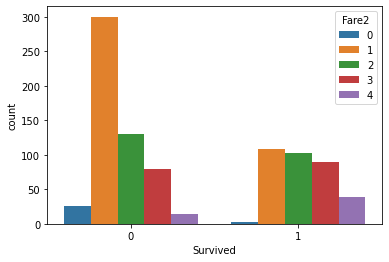

In [137]:
# 변환한 요금으로 생존여부 시각화
sns.countplot(train['Survived'], hue=train['Fare2'])

In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
 9   Age2      891 non-null    int64  
 10  Sex2      891 non-null    int64  
 11  Fare2     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [141]:
# 탑승항구 수치형 변환
train['Embarked2'] = train['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [142]:
train['Embarked2'].value_counts()

2    646
0    168
1     77
Name: Embarked2, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

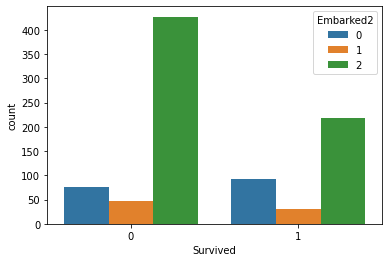

In [143]:
sns.countplot(x=train['Survived'], hue=train['Embarked2'])

In [146]:
# 이름 전처리
train['Name'].tail(100)

791                         Gaskell, Mr. Alfred
792                     Sage, Miss. Stella Anna
793                    Hoyt, Mr. William Fisher
794                       Dantcheff, Mr. Ristiu
795                          Otter, Mr. Richard
                         ...                   
886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, Length: 100, dtype: object

In [156]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')  # \. : 정규식의 .을 의미하는 것이 아님을 의미

In [157]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [158]:
# 성별과 호칭 크로스 비교
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [160]:
# 여성 관련 호칭을 하나로 통합
train['Title'] = train['Title'].str.replace('Mlle', 'Miss')
train['Title'] = train['Title'].str.replace('Mme', 'Miss')
train['Title'] = train['Title'].str.replace('Mrs', 'Miss')
train['Title'] = train['Title'].str.replace('Ms', 'Miss')

<AxesSubplot:xlabel='Survived', ylabel='count'>

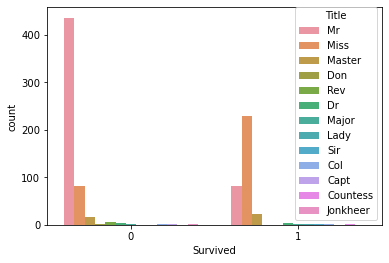

In [162]:
# 호칭과 생존여부 연관성
sns.countplot(x=train['Survived'], hue=train['Title'])

In [163]:
train[['Title', 'Survived']].groupby('Title').mean()

,Survived
Title,
Capt,0.000000
Col,0.500000
Countess,1.000000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000


In [169]:
# 호칭 그룹핑
train['Title'] = train['Title'].replace(['Countess', 'Lady', 'Sir'], 'nob')
train['Title'] = train['Title'].replace(['Rev', 'Jonkheer', 'Don', 'Capt'], 'dead')
train['Title'] = train['Title'].replace(['Master', 'Dr', 'Col', 'Major'], 'half')
train['Title'].value_counts()

Mr      517
Miss    311
half     51
dead      9
nob       3
Name: Title, dtype: int64

In [170]:
train[['Title', 'Survived']].groupby('Title').mean()

,Survived
Title,
Miss,0.739550
Mr,0.156673
dead,0.000000
half,0.549020
nob,1.000000


In [172]:
train['Title'] = train['Title'].map({'Miss':0, 'Mr':1, 'dead':2, 'half':3, 'nob':4})

In [174]:
train['Title'].value_counts()

1    517
0    311
3     51
2      9
4      3
Name: Title, dtype: int64

In [175]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age2,Sex2,Fare2,Embarked2,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,1,2,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,5,1,3,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,3,1,1,2,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4,1,3,2,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,4,0,1,2,1


In [179]:
# 컬럼 삭제
train.drop(['Name', 'Sex', 'Age', 'Fare', 'Embarked'], axis=1, inplace=True)

In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   891 non-null    int64
 1   Pclass     891 non-null    int64
 2   SibSp      891 non-null    int64
 3   Parch      891 non-null    int64
 4   Age2       891 non-null    int64
 5   Sex2       891 non-null    int64
 6   Fare2      891 non-null    int64
 7   Embarked2  891 non-null    int64
 8   Title      891 non-null    int64
dtypes: int64(9)
memory usage: 62.8 KB


### 원핫인코딩

In [184]:
e = pd.get_dummies(train['Embarked2'])
e.columns=['C','Q','S']
train = pd.concat([train, e], axis=1)

In [187]:
e = pd.get_dummies(train['Sex2'])
e.columns=['M','F']
train = pd.concat([train, e], axis=1)

In [189]:
e = pd.get_dummies(train['Title'])
train = pd.concat([train, e], axis=1)

In [203]:
train.drop(['Sex2', 'Embarked2', 'Title'], axis=1, inplace=True)

KeyError: "['Sex2', 'Embarked2', 'Title'] not found in axis"

In [204]:
train.head()

,Survived,Pclass,SibSp,Parch,Age2,Fare2,C,Q,S,M,F,0,1,2,3,4
0,0,3,1,0,2,1,0,0,1,1,0,0,1,0,0,0
1,1,1,1,0,5,3,1,0,0,0,1,1,0,0,0,0
2,1,3,0,0,3,1,0,0,1,0,1,1,0,0,0,0
3,1,1,1,0,4,3,0,0,1,0,1,1,0,0,0,0
4,0,3,0,0,4,1,0,0,1,1,0,0,1,0,0,0


In [205]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [206]:
# SVM (서포트벡터머신)
svc = SVC()
scores = cross_val_score(svc, train.drop('Survived', axis=1), train['Survived'], cv=10) # cv : Kfold값
scores.mean()

0.8271660424469414

In [216]:
# Grid Search
from sklearn.model_selection import GridSearchCV
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}
gs = GridSearchCV(SVC(), params, cv=10, return_train_score=True) # 학습하지 않은 객체를 넣어줌
gs.fit(train.drop('Survived', axis=1), train['Survived'])


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [217]:
# 최적의 매개변수
gs.best_params_

{'C': 100, 'gamma': 0.01}

In [218]:
# SVM 최적의 매개변수 적용
svc = SVC(C=100, gamma=0.01)
scores = cross_val_score(svc, train.drop('Survived', axis=1), train['Survived'], cv=10)
scores.mean()

0.8282771535580524

In [212]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=fe060a32f32376ac07b9b6ba1073c9c088568f41adc5b2f06b81f65a841b6481
  Stored in directory: c:\users\tjoeun-jr-902-02\appdata\local\pip\cache\wheels\df\30\8a\1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


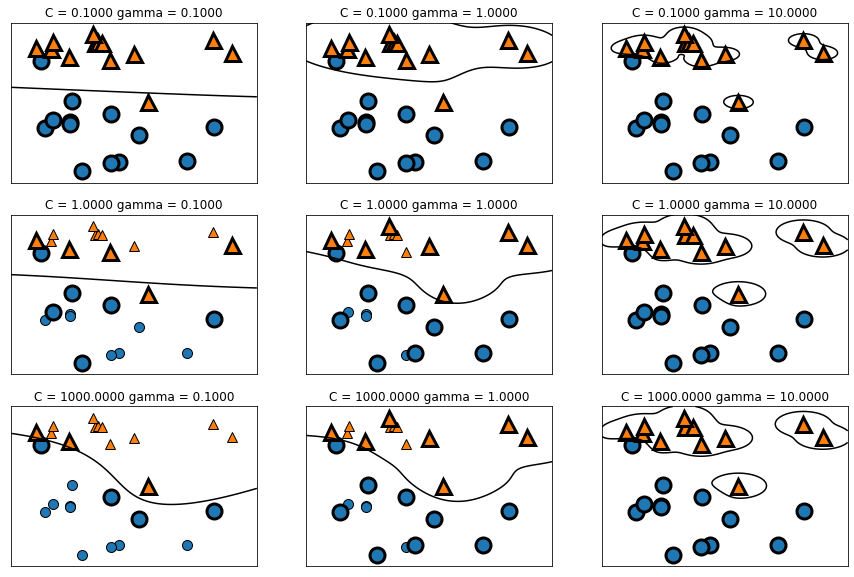

In [215]:
'''
SVM 모델
C, gamma 매개변수 
gamma : 가우시안 커널 폭의 역수(표준편차), 값이 클수록 과적합 가능성 높아짐
C : Cost, 규제변수, 얼마나 많은 데이터 샘플에 다른 분류 데이터를 넣을 것인지
'''
import mglearn
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, [-1, 0, 1]):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax = a)

In [207]:
# 나이브 베이지안 분류
nb = GaussianNB()
scores = cross_val_score(nb, train.drop('Survived', axis=1), train['Survived'], cv=10)
scores.mean()

0.8047066167290886

In [208]:
# 의사결정나무
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, train.drop('Survived', axis=1), train['Survived'], cv=10)
scores.mean()

0.8036204744069912

In [209]:
# KNN
knn = KNeighborsClassifier()
scores = cross_val_score(dt, train.drop('Survived', axis=1), train['Survived'], cv=10)
scores.mean()

0.8002621722846441

In [210]:
# 랜덤포레스트
rf = RandomForestClassifier()
scores = cross_val_score(rf, train.drop('Survived', axis=1), train['Survived'], cv=10)
scores.mean()

0.8125842696629213

In [211]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
scores = cross_val_score(dt, train.drop('Survived', axis=1), train['Survived'], cv=10)
scores.mean()

0.801385767790262

In [ ]:
# 결론 : svc 모델의 성능이 가장 좋았음

### test 데이터 전처리

In [261]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [263]:
# 컬럼 삭제
test.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Age2']= test['Age'].apply(ageTrans)
test['Sex2'] = test['Sex'].map({'male':0, 'female':1})
test['Embarked'] = test['Embarked'].fillna('S')
test['Fare2'] = test['Fare'].apply(fareTrans)
test['Embarked2'] = test['Embarked'].map({'C':0, 'Q':1, 'S':2})
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.') 
test['Title'] = test['Title'].str.replace('Mlle', 'Miss')
test['Title'] = test['Title'].str.replace('Mme', 'Miss')
test['Title'] = test['Title'].str.replace('Mrs', 'Miss')
test['Title'] = test['Title'].str.replace('Ms', 'Miss')
# test['Title'] = test['Title'].str.replace('Dona', 'Miss')
test['Title'] = test['Title'].replace(['Countess', 'Lady', 'Sir'], 'nob')
test['Title'] = test['Title'].replace(['Rev', 'Jonkheer', 'Don', 'Dona', 'Capt'], 'dead')
test['Title'] = test['Title'].replace(['Master', 'Dr', 'Col', 'Major'], 'half')
test['Title'] = test['Title'].map({'Miss':0, 'Mr':1, 'dead':2, 'half':3, 'nob':4})
test.drop(['Name', 'Sex', 'Age', 'Fare', 'Embarked'], axis=1, inplace=True)
e = pd.get_dummies(test['Embarked2'])
e.columns=['C','Q','S']
test = pd.concat([test, e], axis=1)
e = pd.get_dummies(test['Sex2'])
e.columns=['M','F']
test = pd.concat([test, e], axis=1)
e = pd.get_dummies(test['Title'])
test = pd.concat([test, e], axis=1)
test.drop(['Sex2', 'Embarked2', 'Title'], axis=1, inplace=True)

In [266]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   SibSp     891 non-null    int64
 3   Parch     891 non-null    int64
 4   Age2      891 non-null    int64
 5   Fare2     891 non-null    int64
 6   C         891 non-null    uint8
 7   Q         891 non-null    uint8
 8   S         891 non-null    uint8
 9   M         891 non-null    uint8
 10  F         891 non-null    uint8
 11  0         891 non-null    uint8
 12  1         891 non-null    uint8
 13  2         891 non-null    uint8
 14  3         891 non-null    uint8
 15  4         891 non-null    uint8
dtypes: int64(6), uint8(10)
memory usage: 50.6 KB


In [265]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   SibSp        418 non-null    int64
 3   Parch        418 non-null    int64
 4   Age2         418 non-null    int64
 5   Fare2        418 non-null    int64
 6   C            418 non-null    uint8
 7   Q            418 non-null    uint8
 8   S            418 non-null    uint8
 9   M            418 non-null    uint8
 10  F            418 non-null    uint8
 11  0            418 non-null    uint8
 12  1            418 non-null    uint8
 13  2            418 non-null    uint8
 14  3            418 non-null    uint8
dtypes: int64(6), uint8(9)
memory usage: 23.4 KB


In [268]:
# 학습데이터로 가장 좋은 성능을 낸 모델로 학습
svc = SVC(C=100, gamma=0.01)
svc.fit(train.drop('Survived', axis=1), train['Survived'])

SVC(C=100, gamma=0.01)

In [271]:
# train 데이터는 컬럼수가 15개, test 데이터는 컬럼수가 14개라서 에러 발생
test[4] = 0 # 테스트에 컬럼 추가
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   SibSp        418 non-null    int64
 3   Parch        418 non-null    int64
 4   Age2         418 non-null    int64
 5   Fare2        418 non-null    int64
 6   C            418 non-null    uint8
 7   Q            418 non-null    uint8
 8   S            418 non-null    uint8
 9   M            418 non-null    uint8
 10  F            418 non-null    uint8
 11  0            418 non-null    uint8
 12  1            418 non-null    uint8
 13  2            418 non-null    uint8
 14  3            418 non-null    uint8
 15  4            418 non-null    int64
dtypes: int64(7), uint8(9)
memory usage: 26.7 KB


In [273]:
# 테스트 데이터로 예측
pred = svc.predict(test.drop('PassengerId', axis=1))

In [274]:
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [278]:
# 예측한 값을 csv로 저장
result = pd.DataFrame({
    "PassengerId" : test['PassengerId'],
    "Survived" : pred
})
result.to_csv('pred.csv', index=False)

In [279]:
pd.read_csv('pred.csv') # 저장한 뒤에 꼭 확인해볼 것!

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
